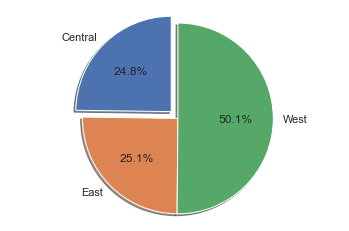

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,West,Female,42,2,119827.493793,1,1,1,101348.88,1
2,15647311,Hill,608,Central,Female,41,1,83807.860000,1,0,1,112542.58,0
3,15619304,Onio,502,West,Female,42,8,159660.800000,3,1,0,113931.57,1
4,15701354,Boni,699,West,Female,39,1,119827.493793,2,0,0,93826.63,0
5,15737888,Mitchell,850,Central,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,West,Male,39,5,119827.493793,2,1,0,96270.64,0
9997,15569892,Johnstone,516,West,Male,35,10,57369.610000,1,1,1,101699.77,0
9998,15584532,Liu,709,West,Female,36,7,119827.493793,1,0,1,42085.58,1


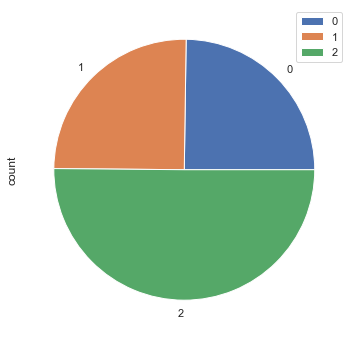

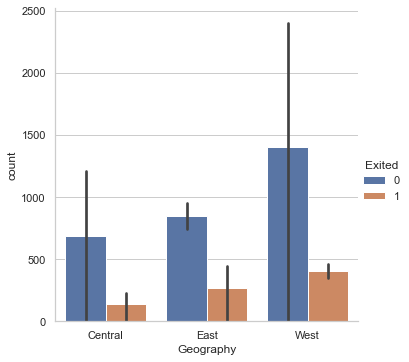

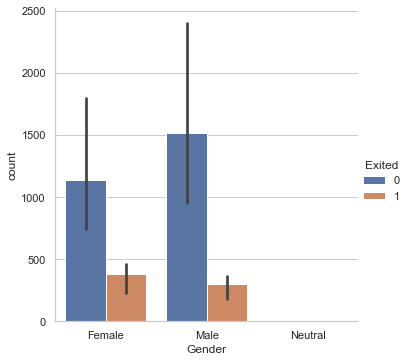

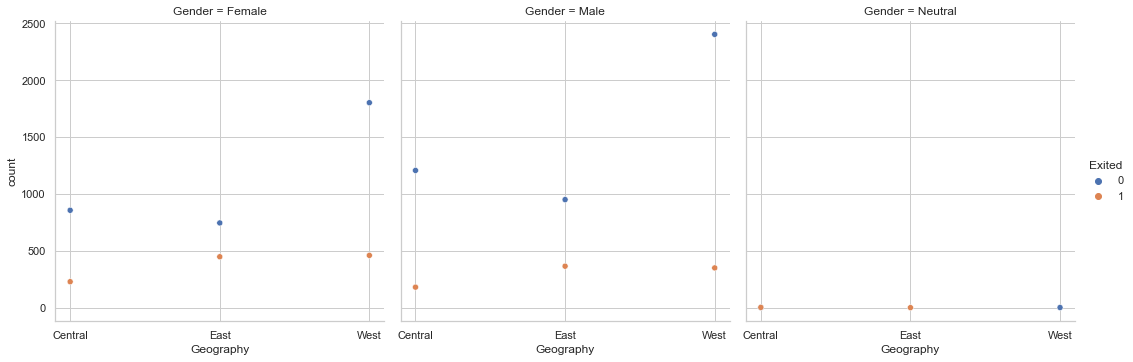

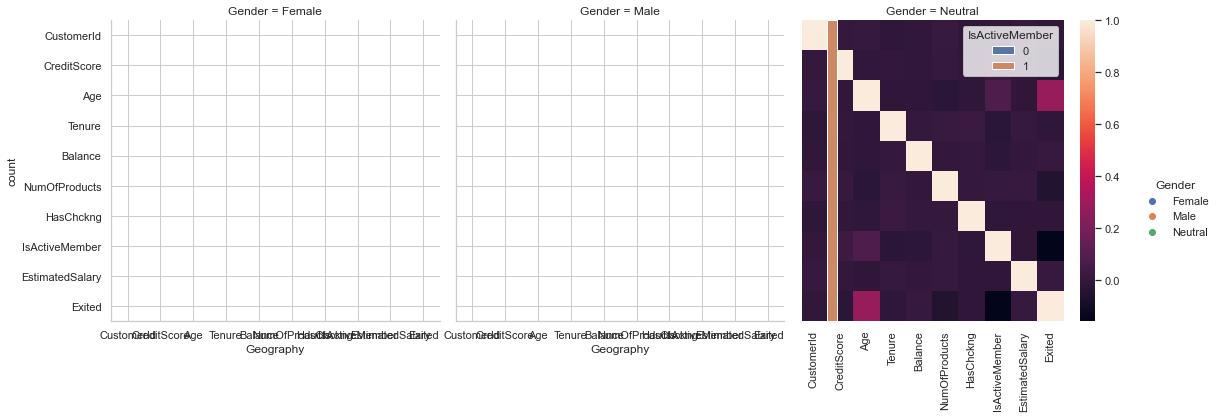

In [63]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

customer_attrition_status = pd.read_csv('Customer Data/Customer Attrition Status.csv')
customer_demographics = pd.read_csv('Customer Data/Customer Demographics.csv')
customer_investment_snapshot = pd.read_csv('Customer Data/Customer Investment Snapshot.csv')
customer_portfolio_snapshot = pd.read_csv('Customer Data/Customer Portfolio Snapshot.csv')

dataframe1 = pd.merge(customer_attrition_status,
                      customer_demographics[['CustomerId','Surname',
                      'Geography','Gender','Age']],on='CustomerId')
dataframe2 = pd.merge(dataframe1,customer_investment_snapshot[[
    'CustomerId','Tenure','CreditScore','EstimatedSalary','Balance']],on='CustomerId')
dataframe3 = pd.merge(dataframe2,customer_portfolio_snapshot[[
    'CustomerId','NumOfProducts','HasChckng','IsActiveMember']],on='CustomerId')
dataframe4=dataframe3.drop_duplicates()
convertdict = {'RowNumber':int,'CustomerId':int,'Surname':'string',
               'CreditScore':int,'Geography':'string',
               'Gender':'string','Age':int,'Tenure':int,'Balance':float,
               'NumOfProducts':int,'HasChckng':int,'IsActiveMember':int,
               'EstimatedSalary':float,'Exited':int}
dataframe5 = dataframe4[['RowNumber','CustomerId','Surname','CreditScore',
                         'Geography','Gender','Age','Tenure','Balance',
                         'NumOfProducts','HasChckng','IsActiveMember',
                         'EstimatedSalary','Exited']]

dataframe5['Balance']=dataframe5['Balance'].fillna(dataframe5['Balance'].mean())
dataframe5['CreditScore']=dataframe5['CreditScore'].fillna(dataframe5['CreditScore'].mean())

dataframe6=dataframe5.astype(convertdict)
dataframe6.set_index('RowNumber',inplace=True)

### how many users are from different zones ####
dataframe7=dataframe6.groupby(['Geography']).CustomerId.count().reset_index(name="count")
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(dataframe7['count'],explode=explode,  labels=dataframe7['Geography'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
dataframe7.plot.pie(y="count",subplots=True,figsize=(11, 6))

### how many users exited from different geography ###
dataframe8=dataframe6[['Geography','Exited','Gender']].groupby(['Geography','Exited','Gender']).size().reset_index(name="count")
sns.set_theme(style="whitegrid")
sns.catplot(x="Geography",y="count",hue="Exited",kind="bar",data=dataframe8)
sns.catplot(x="Gender",y="count",hue="Exited",kind="bar",data=dataframe8)



### how many male and female exited from different category ###
sns.relplot(data=dataframe8,x='Geography',y='count',hue='Exited',col="Gender")



### number of products available gender wise and geography wise
dataframe9=dataframe6.groupby(['Geography','Gender']).NumOfProducts.size().reset_index(name="count")
sns.relplot(data=dataframe9,x='Geography',y='count',hue='Gender',col="Gender")

### How many of are active and Non Active Members in the service which are not exited ###
dataframe10=dataframe6[(dataframe6.Exited==1)].groupby(['IsActiveMember']).CustomerId.count().reset_index(name="count")
sns.barplot(data=dataframe10,x='IsActiveMember',y='count',hue="IsActiveMember")
### write dataframe data to csv file ###
dataframe6.to_csv('file1.csv')

### Generate Heatmap ###
sns.heatmap(dataframe6.corr())

dataframe6


